## Timeseries Analysis of Stock Price

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('reliance_data.csv')

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  4693 non-null   float64
 14  %Deliverble         4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [7]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                   548
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3849
Deliverable Volume    1512
%Deliverble           1512
dtype: int64

### Setting date as index

In [8]:
df['Date_col']= pd.to_datetime(df['Date'],dayfirst=True,format='%d-%m-%Y')

In [9]:
df=df.set_index(df.Date_col)

In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date_col
Date_col,,,,,,,,,,,,,,,,
1996-01-01,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN,1996-01-01
1996-01-02,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN,1996-01-02
1996-01-03,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN,1996-01-03
1996-01-04,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN,1996-01-04
1996-01-05,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN,1996-01-05


In [11]:
df.drop(columns='Date',inplace=True)

<Axes: xlabel='Date_col'>

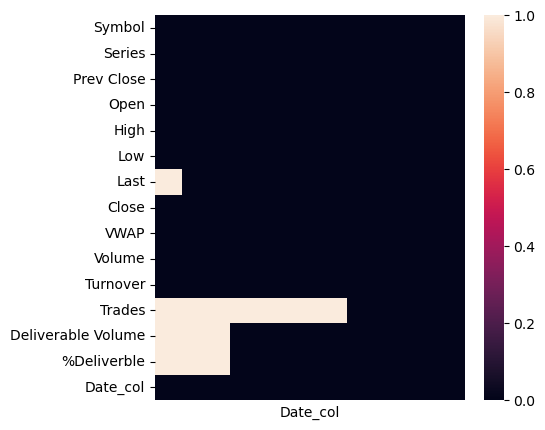

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isna().transpose(),xticklabels=False)

In [13]:
df=df.drop(['Last','Trades','Deliverable Volume','%Deliverble'],axis=1)

C:\Users\vaish\AppData\Local\Temp\ipykernel_4948\807512474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns=["Symbol","Series"]).corr().transpose(), annot=True,cmap='viridis')


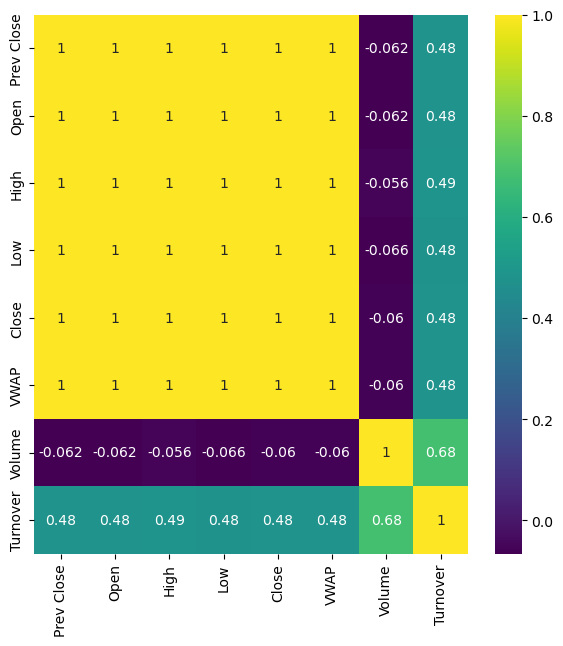

In [14]:

plt.figure(figsize=(7,7))
sns.heatmap(df.drop(columns=["Symbol","Series"]).corr().transpose(), annot=True,cmap='viridis')
plt.show()

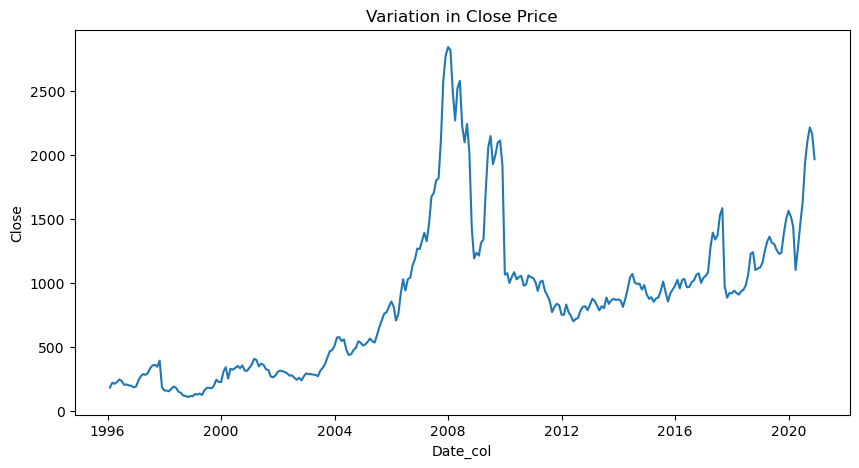

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(df['Close'].resample('M').mean())
plt.title('Variation in Close Price')
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

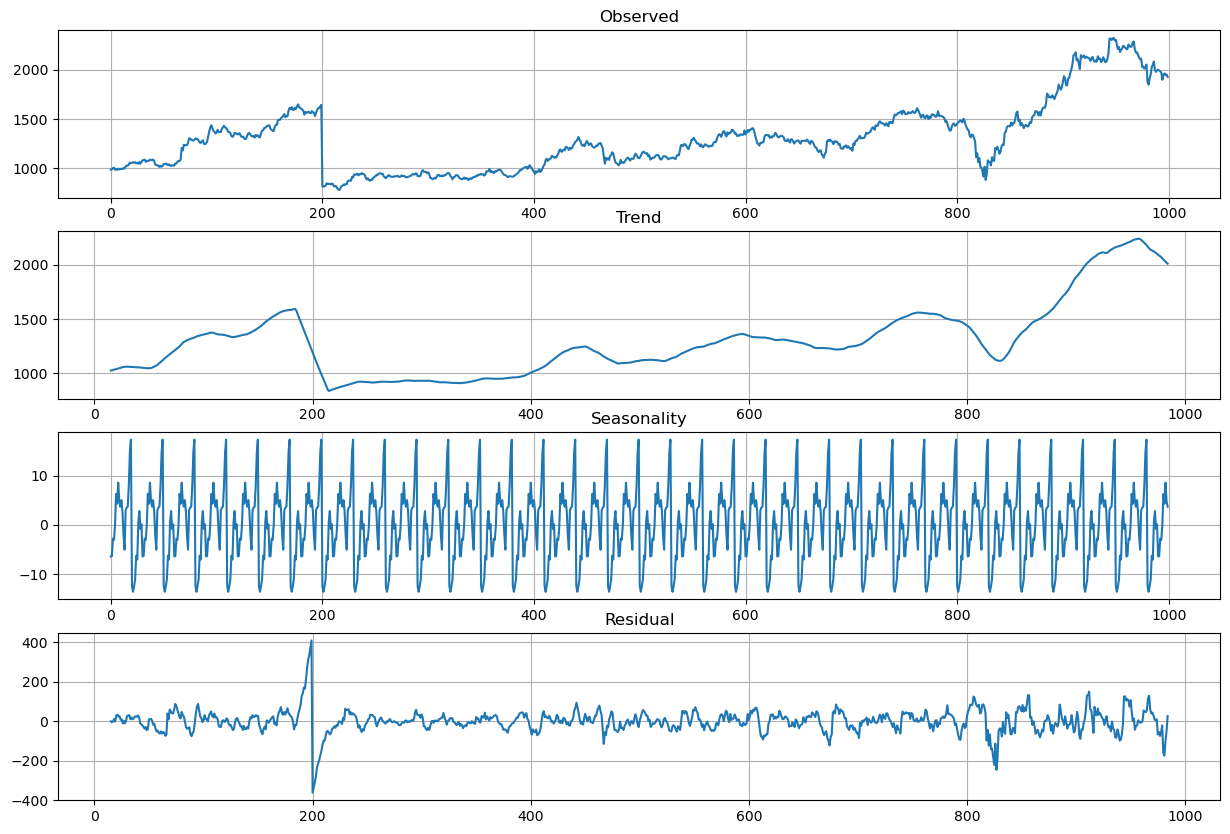

In [26]:
result=seasonal_decompose(df['Close'].iloc[-1000:].values,period=30)
fig, axs = plt.subplots(4,figsize=(15,10))
axs[0].set_title('Observed')
axs[0].plot(result.observed)
axs[0].grid()

axs[1].set_title('Trend')
axs[1].plot(result.trend)
axs[1].grid()

axs[2].set_title('Seasonality')
axs[2].plot(result.seasonal)
axs[2].grid()

axs[3].set_title('Residual')
axs[3].plot(result.resid)
axs[3].grid()

In [20]:
df['Close'].iloc[-1000:].values

array([ 987.5 ,  991.5 , 1001.45, 1009.  ,  987.35,  993.7 ,  986.65,
        997.7 ,  990.05,  997.75,  994.75,  993.85, 1005.2 ,  999.15,
       1020.05, 1028.95, 1027.2 , 1039.8 , 1059.5 , 1052.95, 1057.15,
       1062.55, 1057.9 , 1063.25, 1053.35, 1057.3 , 1047.45, 1064.7 ,
       1049.7 , 1065.45, 1082.4 , 1085.1 , 1089.4 , 1067.15, 1077.4 ,
       1074.95, 1077.7 , 1089.85, 1086.05, 1083.3 , 1090.4 , 1076.25,
       1041.25, 1032.55, 1033.7 , 1025.8 , 1015.9 , 1027.3 , 1017.3 ,
       1025.1 , 1044.8 , 1045.2 , 1049.65, 1043.5 , 1033.65, 1041.65,
       1030.9 , 1025.15, 1032.75, 1030.15, 1029.85, 1049.8 , 1051.3 ,
       1067.5 , 1075.5 , 1075.4 , 1088.2 , 1207.5 , 1182.75, 1238.9 ,
       1238.05, 1234.5 , 1236.75, 1258.55, 1305.35, 1304.95, 1291.2 ,
       1286.75, 1281.65, 1289.5 , 1304.95, 1297.65, 1300.7 , 1280.8 ,
       1263.8 , 1259.7 , 1273.3 , 1286.75, 1251.1 , 1245.75, 1256.65,
       1270.65, 1320.9 , 1374.65, 1415.  , 1438.5 , 1406.6 , 1381.35,
       1372.35, 1354

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

[]

<Figure size 1600x500 with 0 Axes>

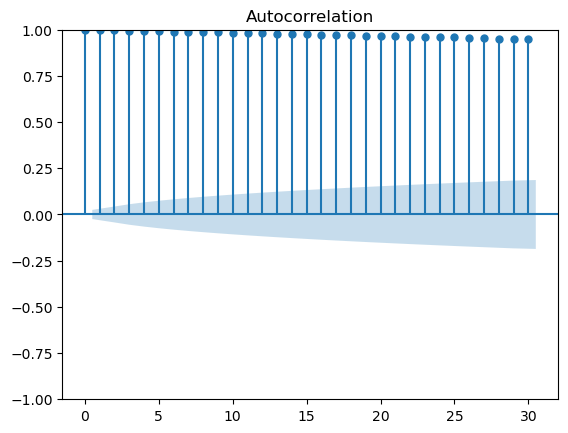

In [55]:
plt.figure(figsize=(16,5))
plot_acf(x=df['Close'],lags=30)
plt.title('Autocorrelation')
plt.plot()

[]

<Figure size 1600x500 with 0 Axes>

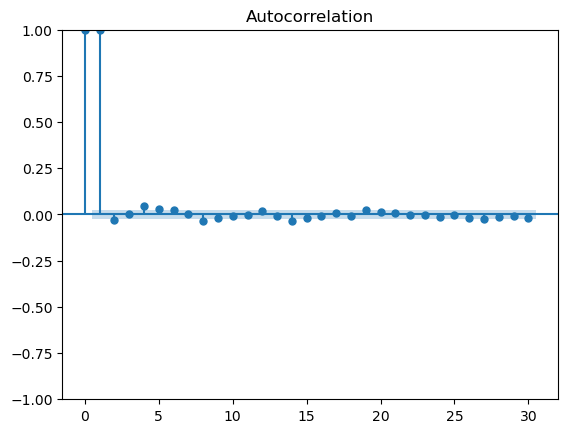

In [52]:
plt.figure(figsize=(16,5))
plot_pacf(x=df['Close'],lags=30,method='ywm')
plt.title('Autocorrelation')
plt.plot()

In [56]:
df['close_1'] = df['Close'].shift(1)
df.dropna(inplace=True)

In [60]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Date_col,close_1
Date_col,,,,,,,,,,,,
1996-01-02,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650,1.230000e+14,1996-01-02,205.75
1996-01-03,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500,1.550000e+14,1996-01-03,204.15
1996-01-04,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000,1.570000e+14,1996-01-04,205.70
1996-01-05,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000,1.200000e+14,1996-01-05,203.80
1996-01-08,RELIANCE,EQ,202.40,202.00,202.15,192.30,194.30,197.57,6675550,1.320000e+14,1996-01-08,202.40


In [61]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day_of_week
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover,Date_col,close_1,year,month,day
Date_col,,,,,,,,,,,,,,,
1996-01-02,RELIANCE,EQ,205.75,205.25,206.25,202.65,204.15,204.13,6024650,1.230000e+14,1996-01-02,205.75,1996,1,1
1996-01-03,RELIANCE,EQ,204.15,207.50,216.95,205.25,205.70,207.04,7473500,1.550000e+14,1996-01-03,204.15,1996,1,2
1996-01-04,RELIANCE,EQ,205.70,203.75,204.40,201.05,203.80,202.47,7744000,1.570000e+14,1996-01-04,205.70,1996,1,3
1996-01-05,RELIANCE,EQ,203.80,203.00,203.00,200.65,202.40,202.05,5952000,1.200000e+14,1996-01-05,203.80,1996,1,4
1996-01-08,RELIANCE,EQ,202.40,202.00,202.15,192.30,194.30,197.57,6675550,1.320000e+14,1996-01-08,202.40,1996,1,0


In [64]:
df.drop(columns=['Symbol','Series','Volume','Turnover','Prev Close','Date_col'],inplace=True)

In [76]:
x = df.drop(columns='Close')
y = df[['Close']]

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=24*7,shuffle=False)

### Model Fitting

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [84]:
lr = LinearRegression(n_jobs=-1)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
xgb = XGBRFRegressor(n_estimators=500,n_jobs=-1)

In [102]:
%%time
reg_list = [lr,dt,rf,xgb]
for reg in reg_list:
    print("="*50)
    name = reg.__class__.__name__
    reg.fit(x_train,y_train.values.ravel())
    print(f"Fitting {name} completed")
    print("="*50)

Fitting LinearRegression completed
Fitting DecisionTreeRegressor completed
Fitting RandomForestRegressor completed
Fitting XGBRFRegressor completed
CPU times: total: 51.2 s
Wall time: 6.06 s


In [104]:
score_dict={}

for reg in reg_list:
    name = reg.__class__.__name__
    y_pred= reg.predict(x_test)
    print("="*50)
    
    print(name)
    print(f"R2_Score: {r2_score(y_test,y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
    print(f"MSE: {mean_squared_error(y_test,y_pred)}")
    print(f"RMSE: {mean_squared_error(y_test,y_pred,squared=False)}")
    
    score_dict[name]={'R2_Score':r2_score(y_test,y_pred),'MAE':mean_absolute_error(y_test,y_pred),'MSE':mean_squared_error(y_test,y_pred),'RMSE':mean_squared_error(y_test,y_pred,squared=False)}
    

LinearRegression
R2_Score: 0.9983941749640436
MAE: 10.236595376325548
MSE: 183.53047892734511
RMSE: 13.547342135169728
DecisionTreeRegressor
R2_Score: 0.9951096012981812
MAE: 17.208630952380947
MSE: 558.925907738095
RMSE: 23.641613898761122
RandomForestRegressor
R2_Score: 0.9972876593210892
MAE: 13.223192857142587
MSE: 309.99465861368896
RMSE: 17.606665175827278
XGBRFRegressor
R2_Score: 0.9957108439035776
MAE: 16.850650315057663
MSE: 490.20961496076745
RMSE: 22.140677834266217


In [107]:
score_df = pd.DataFrame(score_dict).transpose().sort_values(by='R2_Score')
score_df

,R2_Score,MAE,MSE,RMSE
DecisionTreeRegressor,0.995110,17.208631,558.925908,23.641614
XGBRFRegressor,0.995711,16.850650,490.209615,22.140678
RandomForestRegressor,0.997288,13.223193,309.994659,17.606665
LinearRegression,0.998394,10.236595,183.530479,13.547342
